# MBD Project - Stack Overflow - Research question 1 & 2.1: Tags

**PART 1. Trend anlysis for top 20 tags, top 20-40 tags, top 40-60 tags, and spark-related tags (ranked based on tag frequency) - Period: 2015-2022.** <br>
**Data preparation:** Tags are grouped by year and then aggregated by frequency in SO questions. <br>
**Visualization:** Stacked barchart to see overall popularity, and facet bar charts to see trend over time. <br>

**PART 2. Influence of Tags on possibility of getting answered for SO questions: - Period: 2015-2022.** <br>
- 2.1.1: Number of tags/ questions ~ Possibility of getting answers <br>
**Data preparation:** Tags are grouped by number of tags per questions (1-6) => 6 categories. In each categories calculate % of questions containing 1-6 tags, and (2) % of questions get answered. <br>
**Visualization**: Doughnut chart with 2 layers: Outer layer: % or questions, Inner layer: % of questions get answered

- 2.1.2: Adding top 20 popular tags ~ Possibility of getting answers <br>
**Data preparation:** Tags are grouped by using frequency (to filter top 20 popular tags). Percentage of getting answered  = (# questions containing the tag and have AcceptedAnswerId) / # questions containing the tag. <br>
**Visualization**: Grid bar charts

- 2.1.3: Adding top 20 popular tags ~ Waiting time <br>
**Data preparation:** Waiting time: Difference between CreationTime for questions (PostTypeId=1) and CreationTime of corresponding answer (PostTypeId==2, and PostTypeId = AcceptedAnswerId). Tags are grouped by using frequency (to filter top 20 popular tags) <br>
**Visualization**: Bar charts for median and mean of waiting time. (Similar to previous charts, we only fitler top 20 popular tags)

In [1]:
# !pip install pyarrow

In [2]:
# !pip install fastparquet

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# RQ 1: Trend analysis

## Data preparation:

Prepare list of tags in top 20, top 20-40, top 40-60 based on their frequency.

In [4]:
top_tags = pd.read_csv('top_tags_80.csv') # read summary df of 80% tags

In [5]:
top_tags.head()

,Tag,tag_frequency,med_score,med_answer_count,percent_answer,rel_frequency,cum_frequency
0,javascript,2453713,0.0,1.0,0.528266,0.035504,0.035504
1,python,2071327,0.0,1.0,0.513938,0.029971,0.065474
2,java,1878116,0.0,1.0,0.499181,0.027175,0.092650
3,c#,1571198,0.0,1.0,0.559132,0.022734,0.115384
4,php,1451348,0.0,1.0,0.519951,0.021000,0.136384


In [6]:
top_20_tags = top_tags.iloc[:20]['Tag'].to_list()
len(top_20_tags)

20

In [7]:
top_20_tags

['javascript',
 'python',
 'java',
 'c#',
 'php',
 'android',
 'html',
 'jquery',
 'c++',
 'css',
 'ios',
 'mysql',
 'sql',
 'r',
 'node.js',
 'reactjs',
 'arrays',
 'c',
 'asp.net',
 'json']

In [8]:
top_20_40_tags = top_tags.iloc[20:40]['Tag'].to_list()
len(top_20_40_tags)

20

In [9]:
top_20_40_tags

['ruby-on-rails',
 'python-3.x',
 '.net',
 'sql-server',
 'swift',
 'django',
 'objective-c',
 'angular',
 'excel',
 'pandas',
 'angularjs',
 'regex',
 'ruby',
 'linux',
 'iphone',
 'ajax',
 'xml',
 'vba',
 'spring',
 'typescript']

In [10]:
top_40_60_tags = top_tags.iloc[40:60]['Tag'].to_list()
len(top_40_60_tags)

20

In [11]:
top_40_60_tags

['laravel',
 'asp.net-mvc',
 'database',
 'wordpress',
 'string',
 'mongodb',
 'wpf',
 'postgresql',
 'windows',
 'xcode',
 'bash',
 'flutter',
 'oracle',
 'git',
 'amazon-web-services',
 'vb.net',
 'multithreading',
 'list',
 'firebase',
 'dataframe']

## 1.1 Trend anlysis for top 20 popular tags (2015-2022)

In [12]:
# Prepare data
top_tags_year = pd.read_parquet('top_tags_year.parquet')
top_20_tags_year = top_tags_year[top_tags_year['Tag'].isin(top_20_tags)]
top_20_tags_year = top_20_tags_year[top_20_tags_year['Year'].between(2015, 2023)]

In [13]:
df_pivot_top_20_tags= top_20_tags_year.pivot(index='Tag', columns='Year', values='tag_frequency')

In [14]:
from pylab import *
colors = cm.get_cmap('viridis', 8).reversed()
colors
colors.colors

[array([0.993248, 0.906157, 0.143936, 1.      ]),
 array([0.626579, 0.854645, 0.223353, 1.      ]),
 array([0.288921, 0.758394, 0.428426, 1.      ]),
 array([0.122312, 0.633153, 0.530398, 1.      ]),
 array([0.153364, 0.497   , 0.557724, 1.      ]),
 array([0.212395, 0.359683, 0.55171 , 1.      ]),
 array([0.275191, 0.194905, 0.496005, 1.      ]),
 array([0.267004, 0.004874, 0.329415, 1.      ])]

In [15]:
df_pivot_top_20_tags = df_pivot_top_20_tags.reindex(top_20_tags, level = 0)

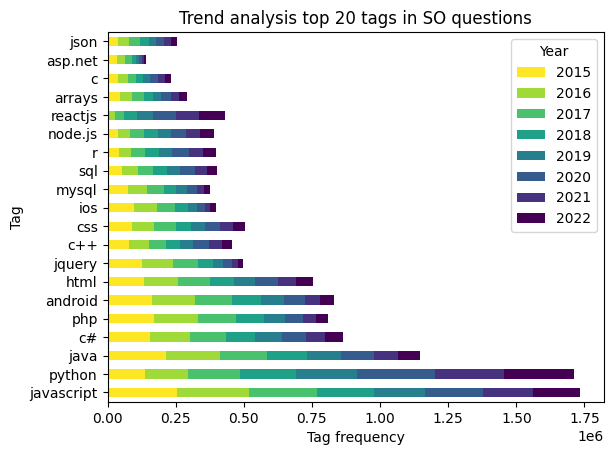

In [16]:
# Plot stacked barchart
fig1 = df_pivot_top_20_tags.plot.barh(stacked=True, color = colors.colors)
fig1.set(title = 'Trend analysis top 20 tags in SO questions',
        ylabel = 'Tag',
        xlabel = 'Tag frequency')
fig1.figure.savefig('trend_20_tags_stackchart.png')

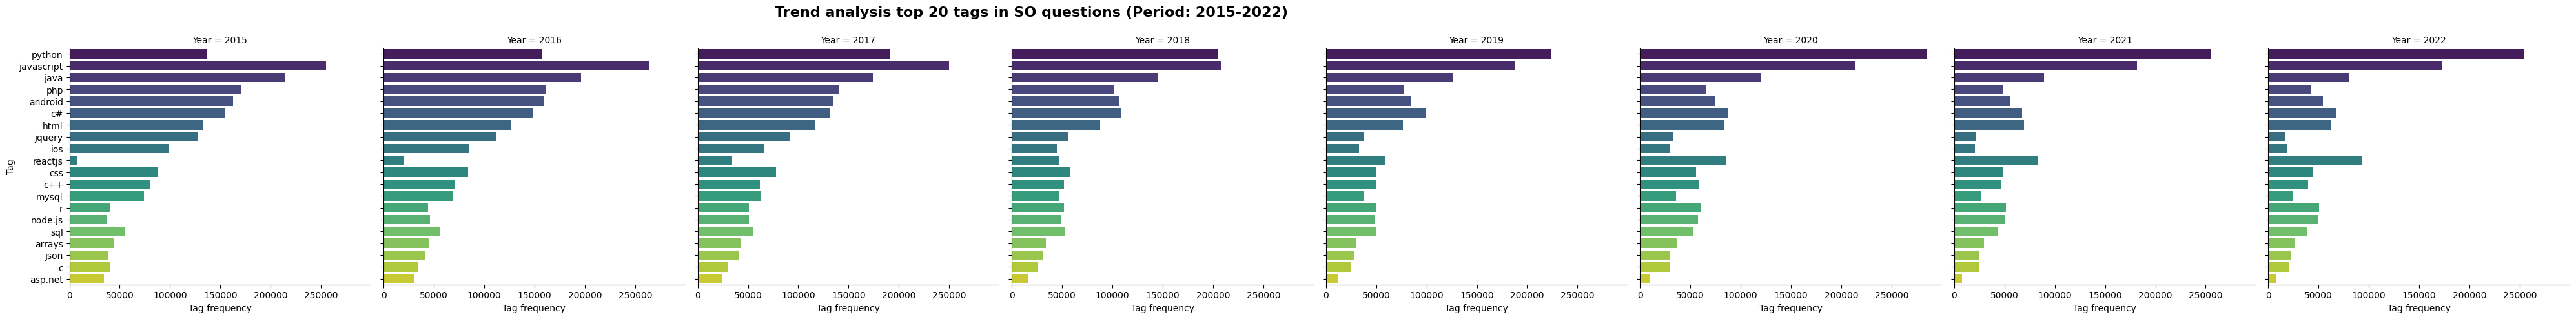

In [17]:
# Barplot using seaborn

g = sns.catplot(
    x='tag_frequency', 
    y='Tag', 
    data=top_20_tags_year.sort_values(by='tag_frequency', ascending=False),
    palette='viridis',
    kind='bar',
    col='Year',
    orient = 'h')

g.set(xlabel = 'Tag frequency',
    ylabel = 'Tag')
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Trend analysis top 20 tags in SO questions (Period: 2015-2022)',
              fontweight ="bold",
              fontsize = 16,
              ha = 'right')
g.savefig('trend_top_20.png')

## 1.2. Trend analysis on top 20-40 tags

In [18]:
# Prepare data
top_tags_year = pd.read_parquet('top_tags_year.parquet')
top_20_40_tags_year = top_tags_year[top_tags_year['Tag'].isin(top_20_40_tags)]
top_20_40_tags_year = top_20_40_tags_year[top_20_40_tags_year['Year'].between(2015, 2023)]

In [19]:
df_pivot_top_20_40_tags= top_20_40_tags_year.pivot(index='Tag', columns='Year', values='tag_frequency')

In [20]:
top_20_40_tags

['ruby-on-rails',
 'python-3.x',
 '.net',
 'sql-server',
 'swift',
 'django',
 'objective-c',
 'angular',
 'excel',
 'pandas',
 'angularjs',
 'regex',
 'ruby',
 'linux',
 'iphone',
 'ajax',
 'xml',
 'vba',
 'spring',
 'typescript']

In [21]:
df_pivot_top_20_40_tags = df_pivot_top_20_40_tags.reindex(top_20_40_tags, level = 0)

In [22]:
# df_pivot_top_20_40_tags

In [23]:
df_pivot_top_20_40_tags.index

Index(['ruby-on-rails', 'python-3.x', '.net', 'sql-server', 'swift', 'django',
       'objective-c', 'angular', 'excel', 'pandas', 'angularjs', 'regex',
       'ruby', 'linux', 'iphone', 'ajax', 'xml', 'vba', 'spring',
       'typescript'],
      dtype='object', name='Tag')

In [24]:
colors = cm.get_cmap('plasma', 8).reversed()
colors
colors.colors

[array([0.940015, 0.975158, 0.131326, 1.      ]),
 array([0.994495, 0.74088 , 0.166335, 1.      ]),
 array([0.95547 , 0.533093, 0.28549 , 1.      ]),
 array([0.85975 , 0.360588, 0.406917, 1.      ]),
 array([0.723444, 0.196158, 0.538981, 1.      ]),
 array([0.546157, 0.038954, 0.64701 , 1.      ]),
 array([0.32515 , 0.006915, 0.639512, 1.      ]),
 array([0.050383, 0.029803, 0.527975, 1.      ])]

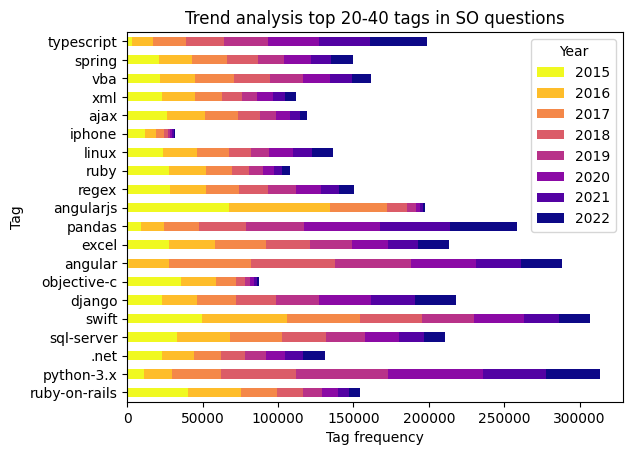

In [25]:
# Plot stacked barchart
fig2 = df_pivot_top_20_40_tags.plot.barh(stacked=True, color = colors.colors)
fig2.set(title = 'Trend analysis top 20-40 tags in SO questions',
        ylabel = 'Tag',
        xlabel = 'Tag frequency')
fig2.figure.savefig('trend_20_40_tags_stackchart.png')

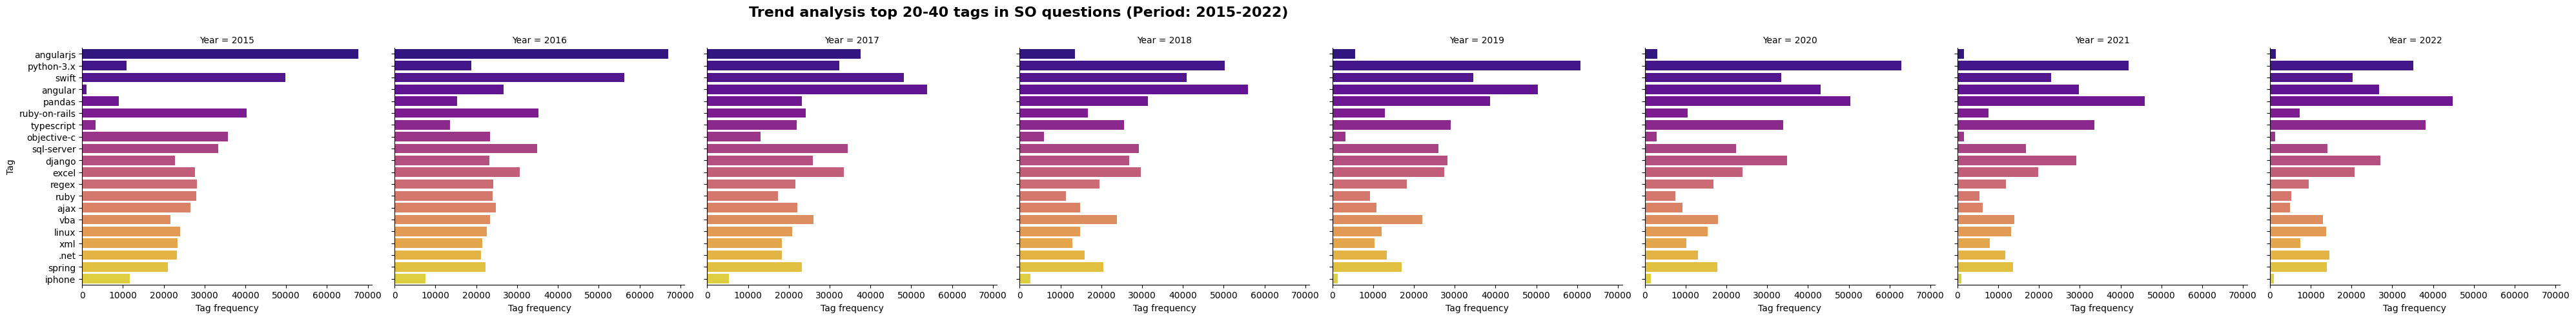

In [26]:
# Barplot using seaborn

g = sns.catplot(
    x='tag_frequency', 
    y='Tag', 
    data=top_20_40_tags_year.sort_values(by='tag_frequency', ascending=False),
    palette='plasma',
    kind='bar',
    col='Year',
    orient = 'h')

g.set(xlabel = 'Tag frequency',
    ylabel = 'Tag')
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Trend analysis top 20-40 tags in SO questions (Period: 2015-2022)',
              fontweight ="bold",
              fontsize = 16,
              ha = 'right')
g.savefig('trend_top_40.png')

## 1.3 Trend analysis on top 40-60 tags

In [27]:
# Prepare data
top_tags_year = pd.read_parquet('top_tags_year.parquet')
top_40_60_tags_year = top_tags_year[top_tags_year['Tag'].isin(top_40_60_tags)]
top_40_60_tags_year = top_40_60_tags_year[top_40_60_tags_year['Year'].between(2015, 2023)]

In [28]:
df_pivot_top_40_60_tags= top_40_60_tags_year.pivot(index='Tag', columns='Year', values='tag_frequency')

In [29]:
df_pivot_top_40_60_tags = df_pivot_top_40_60_tags.reindex(top_40_60_tags, level = 0)

In [30]:
colors = cm.get_cmap('twilight', 8)
colors
colors.colors

array([[0.88575016, 0.85000925, 0.88797365, 1.        ],
       [0.53834016, 0.67797081, 0.77112734, 1.        ],
       [0.37324816, 0.38140849, 0.70598201, 1.        ],
       [0.28669151, 0.08242987, 0.39331183, 1.        ],
       [0.3153587 , 0.079421  , 0.26811904, 1.        ],
       [0.64567349, 0.26155203, 0.31248674, 1.        ],
       [0.79045777, 0.59828134, 0.48622258, 1.        ],
       [0.88571155, 0.85002186, 0.88572539, 1.        ]])

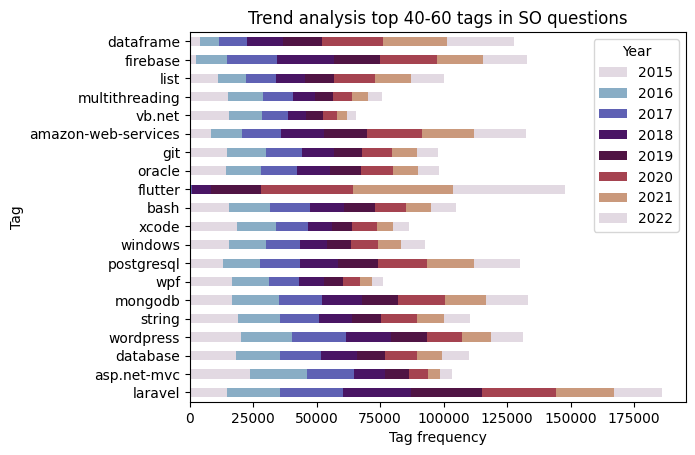

In [31]:
# Plot stacked barchart
fig3 = df_pivot_top_40_60_tags.plot.barh(stacked=True, color = colors.colors)
fig3.set(title = 'Trend analysis top 40-60 tags in SO questions',
        ylabel = 'Tag',
        xlabel = 'Tag frequency')
fig3.figure.savefig('trend_40_60_tags_stackchart.png')

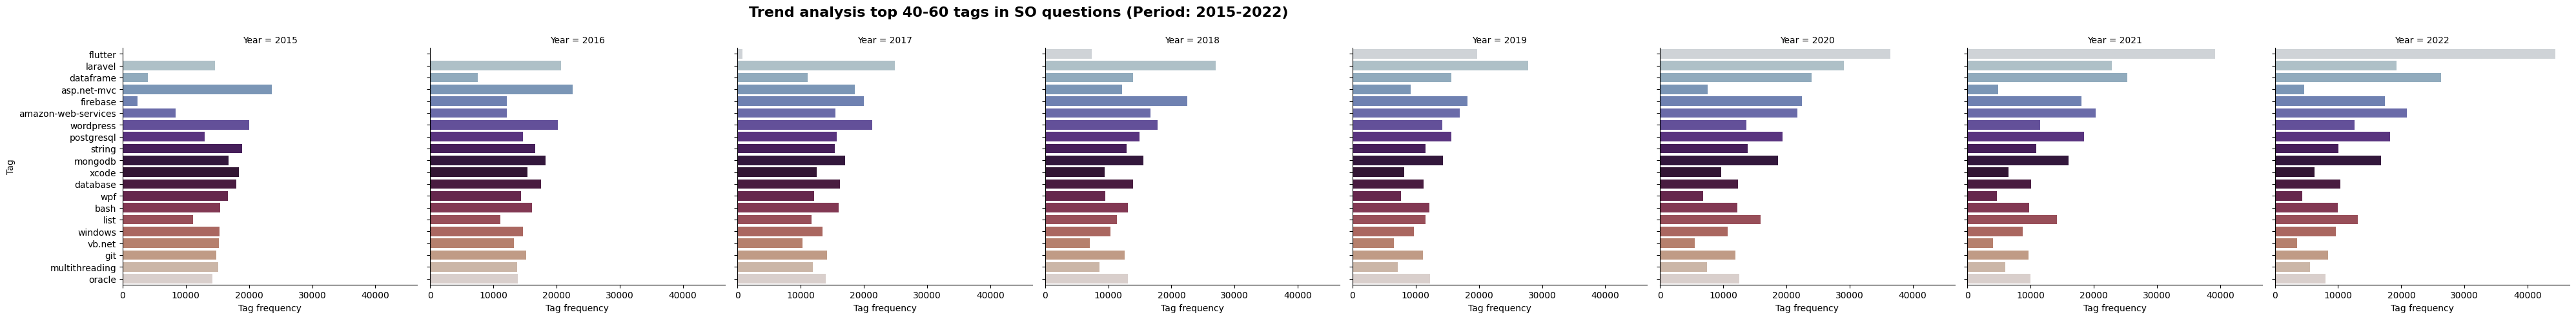

In [32]:
# Barplot using seaborn

g = sns.catplot(
    x='tag_frequency', 
    y='Tag', 
    data=top_40_60_tags_year.sort_values(by='tag_frequency', ascending=False),
    palette='twilight',
    kind='bar',
    col='Year',
    orient = 'h')

g.set(xlabel = 'Tag frequency',
    ylabel = 'Tag')
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Trend analysis top 40-60 tags in SO questions (Period: 2015-2022)',
              fontweight ="bold",
              fontsize = 16,
              ha = 'right')
g.savefig('trend_top_60.png')

## 1.4 Trend analysis for spark-related tags

In [33]:
top_tags = pd.read_csv('top_tags_90.csv') # Get the list of tags relating to spark. 

In [34]:
len(top_tags[top_tags.isnull()])

4748

In [35]:
top_tags.dropna(inplace=True)

In [36]:
top_tags[top_tags['Tag'].str.lower().str.contains("spark")]

,Tag,tag_frequency,med_score,med_answer_count,percent_answer,rel_frequency,cum_frequency
102,apache-spark,78362,1.0,1.0,0.433131,0.001134,0.465135
241,pyspark,35758,0.0,1.0,0.437860,0.000517,0.565965
401,apache-spark-sql,21739,1.0,1.0,0.492019,0.000315,0.629554
1415,spark-streaming,5511,1.0,1.0,0.314281,0.000080,0.781199
2049,spark-dataframe,3497,1.0,1.0,0.448384,0.000051,0.820970
2969,pyspark-sql,2273,1.0,1.0,0.482182,0.000033,0.858222
3002,apache-spark-mllib,2231,1.0,1.0,0.446885,0.000032,0.859297
3043,spark-structured-streaming,2191,1.0,1.0,0.340027,0.000032,0.860609


In [37]:
top_tags_spark = top_tags[top_tags['Tag'].str.lower().str.contains("spark")]['Tag'].to_list()

In [38]:
top_tags_spark

['apache-spark',
 'pyspark',
 'apache-spark-sql',
 'spark-streaming',
 'spark-dataframe',
 'pyspark-sql',
 'apache-spark-mllib',
 'spark-structured-streaming']

In [39]:
# Prepare data
tags_spark = pd.read_parquet('top_tags_year.parquet')
#tags_spark = tags_spark[tags_spark['Tag'].str.lower().str.contains("spark")]
tags_spark = tags_spark[tags_spark['Tag'].isin(top_tags_spark)]
tags_spark = tags_spark[tags_spark['Year'].between(2015, 2023)]

In [40]:
# tags_spark

In [41]:
len(tags_spark['Tag'].unique())

8

In [42]:
df_pivot_spark = tags_spark.pivot(index='Tag', columns='Year', values='tag_frequency')

In [43]:
df_pivot_spark

Year,2015,2016,2017,2018,2019,2020,2021,2022
Tag,,,,,,,,
apache-spark,6732.0,11907.0,12294.0,11825.0,9607.0,9398.0,7515.0,7581.0
apache-spark-mllib,356.0,639.0,532.0,283.0,152.0,93.0,55.0,59.0
apache-spark-sql,971.0,2185.0,2773.0,3263.0,2912.0,3445.0,3161.0,2972.0
pyspark,993.0,2655.0,3464.0,4365.0,4887.0,6170.0,5838.0,7371.0
pyspark-sql,26.0,214.0,431.0,572.0,775.0,255.0,NaN,NaN
spark-dataframe,80.0,1054.0,1596.0,767.0,NaN,NaN,NaN,NaN
spark-streaming,667.0,1317.0,1091.0,802.0,478.0,459.0,260.0,344.0
spark-structured-streaming,NaN,20.0,217.0,406.0,488.0,408.0,312.0,340.0


In [44]:
colors = cm.get_cmap('Paired', 8).reversed()
colors
colors.colors

[array([0.69411765, 0.34901961, 0.15686275, 1.        ]),
 array([1. , 1. , 0.6, 1. ]),
 array([0.79215686, 0.69803922, 0.83921569, 1.        ]),
 array([0.99215686, 0.74901961, 0.43529412, 1.        ]),
 array([0.89019608, 0.10196078, 0.10980392, 1.        ]),
 array([0.2       , 0.62745098, 0.17254902, 1.        ]),
 array([0.12156863, 0.47058824, 0.70588235, 1.        ]),
 array([0.65098039, 0.80784314, 0.89019608, 1.        ])]

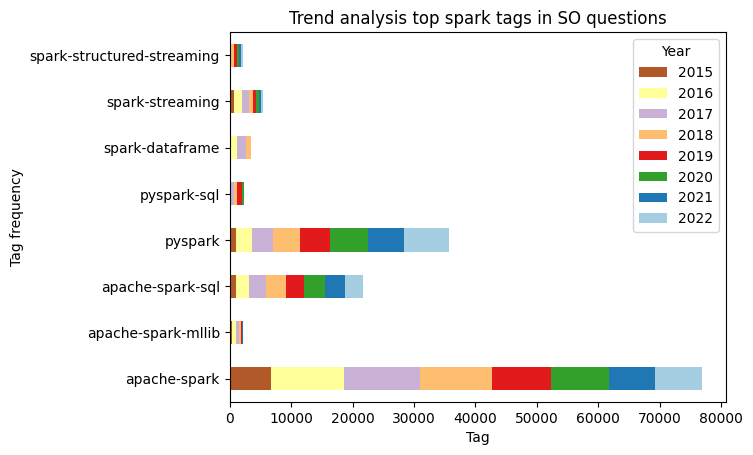

In [45]:
# Plot stacked barchart
fig4 = df_pivot_spark.plot.barh(stacked=True, color = colors.colors)
fig4.set(title = 'Trend analysis top spark tags in SO questions',
        xlabel = 'Tag',
        ylabel = 'Tag frequency')
fig4.figure.savefig('trend_spark_tags_stackchart.png')

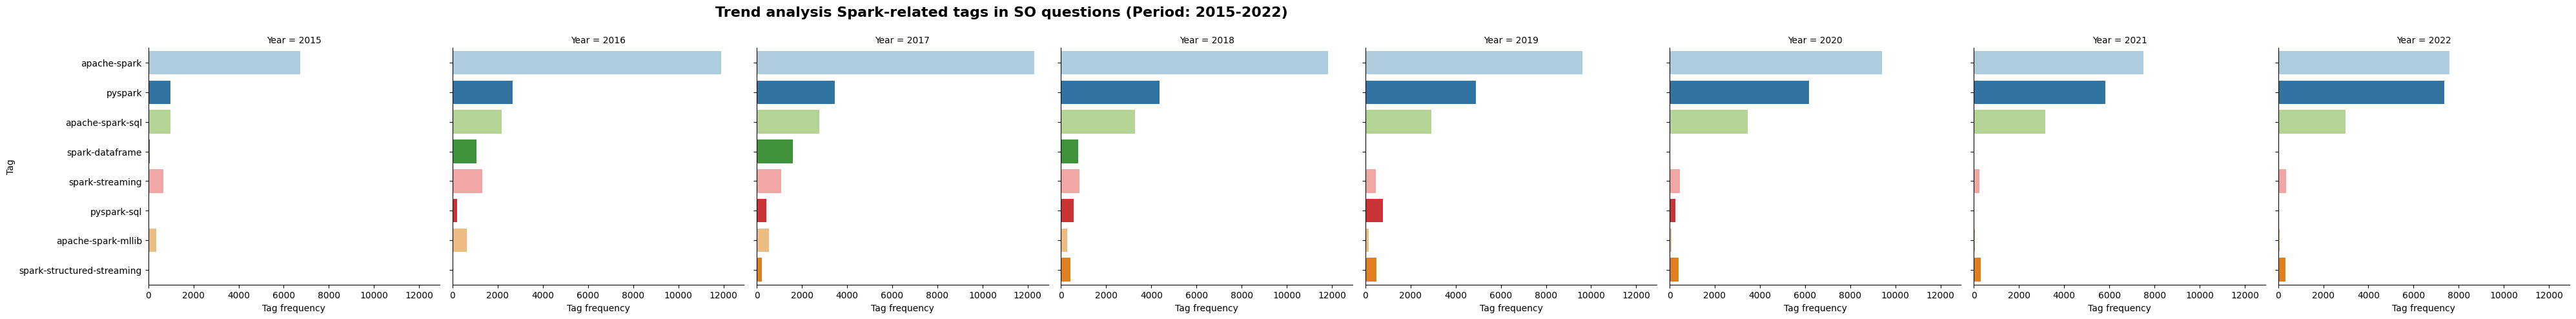

In [46]:
# Barplot using seaborn

g = sns.catplot(
    x='tag_frequency', 
    y='Tag', 
    data=tags_spark.sort_values(by='tag_frequency', ascending=False),
    palette='Paired',
    kind='bar',
    col='Year',
    orient = 'h')

g.set(xlabel = 'Tag frequency',
    ylabel = 'Tag')
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Trend analysis Spark-related tags in SO questions (Period: 2015-2022)',
              fontweight ="bold",
              fontsize = 16,
              ha = 'right')
g.savefig('trend_tag_spark.png')

# RQ 2: Influence of Tags on Possibility of SO questions getting answered

## 2.1: Number of Tags per questions

In [47]:
tags_num = pd.read_csv('tags_num.csv')

In [48]:
tags_num['num_without_answer'] = tags_num['num_question'] - tags_num['num_question_with_answer']
tags_num['percent_without_answer'] = 1 - tags_num['percent_answer']
tags_num.sort_values(by = 'TagCountPerPost', inplace = True)

In [49]:
tags_num.head()

,TagCountPerPost,num_question,num_question_with_answer,percent_all,percent_answer,num_without_answer,percent_without_answer
0,1,2758078,1373691,0.1185,0.4981,1384387,0.5019
5,2,6074429,3152969,0.2610,0.5191,2921460,0.4809
2,3,6689117,3443404,0.2874,0.5148,3245713,0.4852
4,4,4619723,2349339,0.1985,0.5085,2270384,0.4915
3,5,3131543,1539640,0.1346,0.4917,1591903,0.5083


In [50]:
# Prepare data for nested doughnut
outer_values = tags_num['num_question'].values.flatten()
inner_values = tags_num[['num_question_with_answer', 'num_without_answer']]
inner_values = inner_values.values.flatten()

In [51]:
# Prepare colos for nested doughnut
from pylab import *
outer_colors = cm.get_cmap('viridis', 6).reversed()
outer_colors
outer_colors.colors
inner_colors = []
for i in outer_colors.colors:
    x = i * 0.8
    y = i * 0.2
    inner_colors.append(x)
    inner_colors.append(y)

In [52]:
inner_colors

[array([0.7945984, 0.7249256, 0.1151488, 0.8      ]),
 array([0.1986496, 0.1812314, 0.0287872, 0.2      ]),
 array([0.3820032, 0.6571552, 0.254556 , 0.8      ]),
 array([0.0955008, 0.1642888, 0.063639 , 0.2      ]),
 array([0.1077536, 0.5269088, 0.4141192, 0.8      ]),
 array([0.0269384, 0.1317272, 0.1035298, 0.2      ]),
 array([0.1309   , 0.3769064, 0.4465184, 0.8      ]),
 array([0.032725 , 0.0942266, 0.1116296, 0.2      ]),
 array([0.203148 , 0.2122032, 0.4239864, 0.8      ]),
 array([0.050787 , 0.0530508, 0.1059966, 0.2      ]),
 array([0.2136032, 0.0038992, 0.263532 , 0.8      ]),
 array([0.0534008, 0.0009748, 0.065883 , 0.2      ])]

In [53]:
inner_data_labels = []
for i in tags_num['percent_answer']:
    label = '{:.1%}'.format(i)
    print(label)
    inner_data_labels.append(label)
    inner_data_labels.append(' ')
print(inner_data_labels)

49.8%
51.9%
51.5%
50.8%
49.2%
42.9%
['49.8%', ' ', '51.9%', ' ', '51.5%', ' ', '50.8%', ' ', '49.2%', ' ', '42.9%', ' ']


In [54]:
# inner_data_labels = tags_num[['percent_answer', 'percent_without_answer']]
# # inner_labels = [tags_num['percent_answer'], 1-tags_num['percent_answer']]

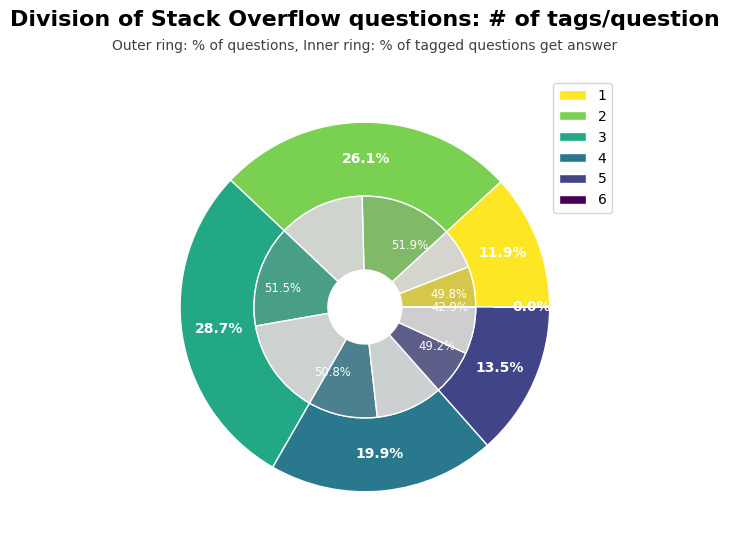

In [55]:
# Plot tags num per question

import numpy as np
outer_labels = tags_num['num_question']
explode = (0, 0, 0, 0, 0, 0.1)

fig, ax = plt.subplots()
size = 0.4
#outer_colors = ['#fde725', '#7ad151', '#22a884', '#2a788e', '#414487', '#440154']
#inner_colors = ['#242846C9', '#9B2524c9']
ax.pie(outer_values, radius=1,
       explode=explode,
       colors=outer_colors.colors, 
       #labels=outer_labels,
       autopct='%.1f%%',
       wedgeprops=dict(width=size, edgecolor='w'),
       #labeldistance = None,
       pctdistance = 0.8,
       textprops = {'color': 'w', 'weight':'bold'})

plt.legend(tags_num['TagCountPerPost'], loc='best', bbox_to_anchor=(1.05,1))

ax.pie(inner_values, radius=1-size,
       colors=inner_colors, 
       # labels = list(inner_data_labels.values.flatten()),
       labels = inner_data_labels,
       #autopct='%.1f%%',
       labeldistance = 0.6,
       pctdistance = 0.65,
       wedgeprops=dict(width=size, edgecolor='w'),
       textprops = {'color': 'w', 'size':'small'})

ax.set(aspect="equal")

#plt.title('Outer ring: % of questions, Inner ring: % of questions get answer')
#plt.suptitle('Questions division based on number of tags')
#plt.show()
#plt.savefig('Tag_num.png', dpi='figure')

ax.text(x=0.5, y=1.1, s='Division of Stack Overflow questions: # of tags/question', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Outer ring: % of questions, Inner ring: % of tagged questions get answer', fontsize=10, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

fig.set_size_inches(8, 6)
fig.savefig('tags_num.png', dpi=100)

## 2.1.2 Adding top tags and possibility of getting answered

In [57]:
df_top_20_tags = top_tags.iloc[:20]

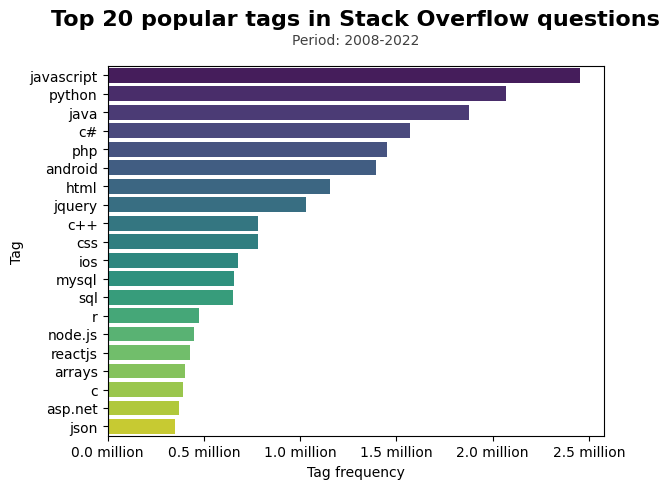

In [58]:
# Plot in seaborn
from matplotlib.ticker import NullFormatter

def formatter(x, pos):
    return str(round(x / 1e6, 1)) + " million"

fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_minor_formatter(NullFormatter())
ax.plot([0, 1], [0, 2e7])

fig = sns.barplot(data = df_top_20_tags, 
            y = 'Tag', 
            x = 'tag_frequency', 
            orient= "h",
            palette='viridis')

fig.set(
    # title='Top 20 popular tags in Stack Overflow questions',
       xlabel = 'Tag frequency',
       ylabel = 'Tag')

ax.text(x=0.5, y=1.1, s='Top 20 popular tags in Stack Overflow questions', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Period: 2008-2022', fontsize=10, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
fig.figure.savefig('top_20_tags.png', dpi=100)

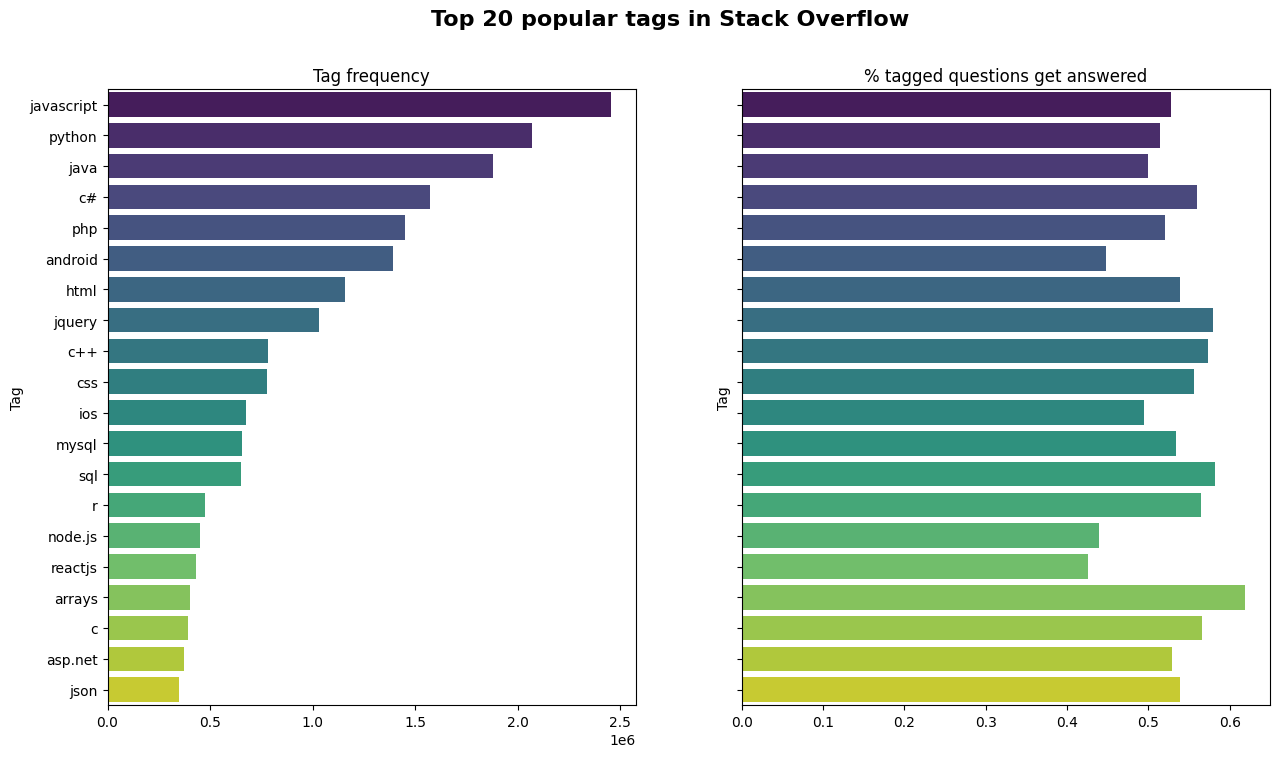

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
fig.suptitle('Top 20 popular tags in Stack Overflow', fontsize = 16, weight = 'bold')

# Frequency
sns.barplot(ax=axes[0],
           data = df_top_20_tags, 
            y = 'Tag', 
            x = 'tag_frequency', 
            orient= "h",
            palette='viridis')
axes[0].set(title = 'Tag frequency', xlabel = '')

# Med_percentage answer
sns.barplot(ax=axes[1], 
            data = df_top_20_tags, 
            y = 'Tag', 
            x = 'percent_answer', 
            orient= "h",
            palette='viridis')
axes[1].set(title = '% tagged questions get answered', xlabel = '')
fig.figure.savefig('top_20_tags_response.png', dpi=100)

## 2.1.3 Influence of Tags on Waiting time

In [61]:
top_tags_response = pd.read_parquet('top_tags_response.parquet')

In [62]:
top_tags_response.head()

,Tag,tag_frequency,med_score,med_answer_count,med_AnswerDurationSeconds,med_AnswerDurationHour,med_AnswerDurationDays,avg_AnswerDurationSeconds,avg_AnswerDurationHour,avg_AnswerDurationDays
0,resourcedictionary,641,1.0,1.0,5911.0,1.641944,0.0,1.085688e+06,301.579999,12.561622
1,regex-greedy,627,1.0,2.0,952.0,0.264444,0.0,2.766144e+04,7.683734,0.325359
2,algolia,664,1.0,1.0,25985.0,7.218056,0.0,5.309539e+05,147.487190,6.153614
3,hibernate-validator,607,1.0,1.0,24178.0,6.716111,0.0,7.686309e+05,213.508581,8.907743
4,google-docs-api,636,1.0,1.0,24581.0,6.828056,0.0,1.620733e+06,450.203715,18.762579


In [63]:
top_tags_response.sort_values(by='tag_frequency', ascending=False, inplace=True)

In [64]:
top_tags_response

,Tag,tag_frequency,med_score,med_answer_count,med_AnswerDurationSeconds,med_AnswerDurationHour,med_AnswerDurationDays,avg_AnswerDurationSeconds,avg_AnswerDurationHour,avg_AnswerDurationDays
42845,javascript,1296199,0.0,1.0,1306.0,0.362778,0.0,6.541942e+05,181.720597,7.570670
38254,python,1064528,1.0,1.0,1667.0,0.463056,0.0,7.901177e+05,219.477137,9.143574
49715,java,937499,1.0,1.0,1807.0,0.501944,0.0,8.619793e+05,239.438705,9.974766
54746,c#,878472,1.0,1.0,1709.0,0.474722,0.0,7.894560e+05,219.293322,9.137392
926,php,754618,0.0,2.0,1135.0,0.315278,0.0,6.484306e+05,180.119617,7.502181
...,...,...,...,...,...,...,...,...,...,...
39332,opentype-svg-font,1,2.0,1.0,3929616.0,1091.560000,46.0,3.929616e+06,1091.560000,46.000000
39333,eremetic,1,0.0,1.0,91461.0,25.405833,1.0,9.146100e+04,25.405833,1.000000
39334,php-arc,1,-3.0,1.0,623.0,0.173056,0.0,6.230000e+02,0.173056,0.000000
39335,citeproc-js,1,1.0,1.0,86741.0,24.094722,1.0,8.674100e+04,24.094722,1.000000


In [65]:
top_20tags_response = top_tags_response.iloc[:20]

In [66]:
top_20tags_response

,Tag,tag_frequency,med_score,med_answer_count,med_AnswerDurationSeconds,med_AnswerDurationHour,med_AnswerDurationDays,avg_AnswerDurationSeconds,avg_AnswerDurationHour,avg_AnswerDurationDays
42845,javascript,1296199,0.0,1.0,1306.0,0.362778,0.0,6.541942e+05,181.720597,7.570670
38254,python,1064528,1.0,1.0,1667.0,0.463056,0.0,7.901177e+05,219.477137,9.143574
49715,java,937499,1.0,1.0,1807.0,0.501944,0.0,8.619793e+05,239.438705,9.974766
54746,c#,878472,1.0,1.0,1709.0,0.474722,0.0,7.894560e+05,219.293322,9.137392
926,php,754618,0.0,2.0,1135.0,0.315278,0.0,6.484306e+05,180.119617,7.502181
25678,android,623266,1.0,1.0,2567.0,0.713056,0.0,1.297144e+06,360.317695,15.011729
25659,html,622433,0.0,2.0,1090.0,0.302778,0.0,5.384546e+05,149.570723,6.230402
38251,jquery,597127,0.0,2.0,948.0,0.263333,0.0,4.824409e+05,134.011361,5.581689
54743,c++,448724,1.0,2.0,1266.0,0.351667,0.0,6.895215e+05,191.533743,7.976995
25665,css,433132,0.0,2.0,1140.0,0.316667,0.0,5.590034e+05,155.278716,6.468813


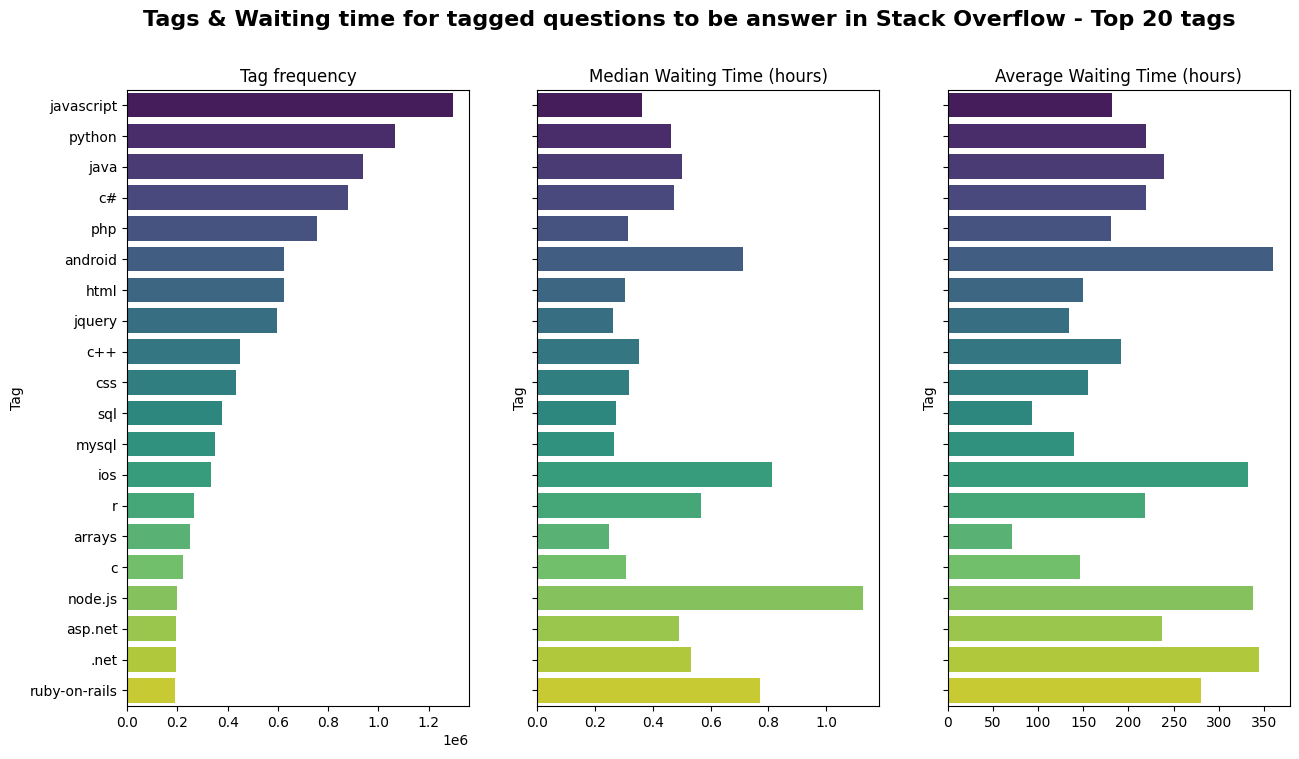

In [67]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8), sharey=True)
fig.suptitle('Tags & Waiting time for tagged questions to be answer in Stack Overflow - Top 20 tags', fontsize = 16, weight = 'bold')

# Frequency
sns.barplot(ax=axes[0],
           data = top_20tags_response, 
            y = 'Tag', 
            x = 'tag_frequency', 
            orient= "h",
            palette='viridis')
axes[0].set(title = 'Tag frequency', xlabel = ' ')

# med_AnswerDurationHour
sns.barplot(ax=axes[1], 
            data = top_20tags_response, 
            y = 'Tag', 
            x = 'med_AnswerDurationHour', 
            orient= "h",
            palette='viridis')
axes[1].set(title = 'Median Waiting Time (hours)', xlabel = ' ')


# med_AnswerDurationHour
sns.barplot(ax=axes[2], 
            data = top_20tags_response, 
            y = 'Tag', 
            x = 'avg_AnswerDurationHour', 
            orient= "h",
            palette='viridis')
axes[2].set(title = 'Average Waiting Time (hours)', xlabel = '')

fig.figure.savefig('top_20_tags_waiting_time.png', dpi=100)

#plt.text(x=0.5, y=1.1, s='Top 20 popular tags in Stack Overflow', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
#plt.text(x=0.5, y=1.05, s='Period: 2008-2022', fontsize=10, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)